In [1]:
import tensorflow as tf
import pandas as pd

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

import os


Create a U-Net model. I iniatlly used and adopted a classical UNet Model. Then I tried a different model design, which worked much better. I kept the layers of the old design, so that you can see the difference. 

In [2]:
from tensorflow.keras import layers
base_size = 40


# declaring the input layer
# In the original paper the network consisted of only one channel.
inputs = layers.Input(shape=(256, 256, 3))
# first part of the U - contracting part
c0  = layers.Conv2D(base_size, activation='relu', kernel_size=4, strides=1, padding = "same")(inputs) 
c01 = layers.Conv2D(base_size, activation='relu', kernel_size=4, strides=2, padding = "same")(c0) 
max1 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same')(c01)

c1 = layers.Conv2D(base_size * 2, activation='relu', kernel_size=4, padding='same')(max1)
c11 = layers.Conv2D(base_size * 2, activation='relu', kernel_size=4, padding='same')(c1)
max2 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(c11)

c2 = layers.Conv2D(base_size * 4, activation='relu', kernel_size=4, padding='same')(max2)
c21 = layers.Conv2D(base_size * 4, activation='relu', kernel_size=4, padding='same')(c2)
max3 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(c21)

c3 = layers.Conv2D(base_size * 4, activation='relu', kernel_size=10, padding='same')(max3)
c31 = layers.Conv2D(base_size * 2, activation='relu', kernel_size=10, padding='same')(c3)
c32 = layers.Conv2D(base_size, activation='relu', kernel_size=10, padding='same')(c31)

# We will now start the second part of the U - expansive part
u1 = layers.UpSampling2D(size=(16,16))(c32)
#u1 = layers.Conv2DTranspose(base_size, kernel_size=2, strides=(2,2), activation='relu')(c32)

#concat1 = layers.concatenate([c2, u1], axis=-1)

#c4 = layers.Conv2D(base_size * 2, activation='relu', kernel_size=4, padding = "same")(concat1) 
#u2 = layers.Conv2DTranspose(base_size * 2, kernel_size=2, strides=(2, 2), activation='relu')(c4)

#concat2 = layers.concatenate([c1, u1], axis=-1)
#c5 = layers.Conv2D(base_size, activation='relu', kernel_size=4, padding = "same")(concat2) 
#u3 = layers.Conv2DTranspose(base_size, kernel_size=4, strides=(4, 4), activation='relu')(u1)

#concat3 = layers.concatenate([c01, u3], axis=-1)
#c6 = layers.Conv2D(base_size, activation='relu', kernel_size=4, padding = "same")(u3) 
#u4 = layers.Conv2DTranspose(base_size, kernel_size=2, strides=(2, 2), activation='relu')(u3)
c7 = layers.Conv2D(base_size, activation='relu', kernel_size=4, padding = "same")(u1) 
outputs = layers.Conv2D(1, activation='relu', kernel_size=4, padding = "same")(c7) 





model = tf.keras.Model(inputs=inputs, outputs=outputs, name="u-netmodel")


# Used to be able to pick the proper shapes for the NN

for layer in model.layers:
    print(layer.name)
    print(layer.output_shape)

input_1
[(None, 256, 256, 3)]
conv2d
(None, 256, 256, 40)
conv2d_1
(None, 128, 128, 40)
max_pooling2d
(None, 64, 64, 40)
conv2d_2
(None, 64, 64, 80)
conv2d_3
(None, 64, 64, 80)
max_pooling2d_1
(None, 32, 32, 80)
conv2d_4
(None, 32, 32, 160)
conv2d_5
(None, 32, 32, 160)
max_pooling2d_2
(None, 16, 16, 160)
conv2d_6
(None, 16, 16, 160)
conv2d_7
(None, 16, 16, 80)
conv2d_8
(None, 16, 16, 40)
up_sampling2d
(None, 256, 256, 40)
conv2d_9
(None, 256, 256, 40)
conv2d_10
(None, 256, 256, 1)


Load the data

In [3]:

path = "C:/Users/weime/Documents/Python Scripts/CircularFashion/Data/fashion-dataset/prepared-data"

train_images = np.load(path + "/training_images" + "0"+ ".npy")
target_images   = np.load(path + "/target_images"+ "0"+ ".npy")[:,:,:,0:1]

Train the Model. The batch size has to be that small, because my Grapghik card cant handle larger badges. You may increase this. 

In [4]:

model.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=0.01),   loss= tf.keras.losses.MeanSquaredError())

history = model.fit(
    train_images,
    target_images,
    batch_size=5,
    epochs=10,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    #validation_data=(x_val, y_val),
)



Epoch 1/10
99/99 [==============================] - 182s 999ms/step - loss: 0.0307
Epoch 2/10
99/99 [==============================] - 99s 1s/step - loss: 0.0292
Epoch 3/10
99/99 [==============================] - 99s 1000ms/step - loss: 0.0281
Epoch 4/10
99/99 [==============================] - 99s 1000ms/step - loss: 0.0272
Epoch 5/10
99/99 [==============================] - 99s 1s/step - loss: 0.0263
Epoch 6/10
99/99 [==============================] - 99s 1000ms/step - loss: 0.0254
Epoch 7/10
99/99 [==============================] - 99s 998ms/step - loss: 0.0242
Epoch 8/10
99/99 [==============================] - 99s 997ms/step - loss: 0.0230
Epoch 9/10
99/99 [==============================] - 99s 998ms/step - loss: 0.0222
Epoch 10/10
99/99 [==============================] - 99s 999ms/step - loss: 0.0211


In [5]:

path = "C:/Users/weime/Documents/Python Scripts/CircularFashion/Data/fashion-dataset/prepared-data"

train_images = np.load(path + "/training_images" + "1"+ ".npy")
target_images   = np.load(path + "/target_images"+ "1"+ ".npy")[:,:,:,0:1]

In [50]:
model.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=0.01),   loss= tf.keras.losses.MeanSquaredError())

history = model.fit(
    train_images,
    target_images,
    batch_size=3,
    epochs=10,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    #validation_data=(x_val, y_val),
)


Epoch 1/10
165/165 [==============================] - 106s 634ms/step - loss: 0.0180
Epoch 2/10
165/165 [==============================] - 105s 634ms/step - loss: 0.0170
Epoch 3/10
165/165 [==============================] - 105s 635ms/step - loss: 0.0165
Epoch 4/10
165/165 [==============================] - 105s 634ms/step - loss: 0.0159
Epoch 5/10
165/165 [==============================] - 105s 634ms/step - loss: 0.0154
Epoch 6/10
165/165 [==============================] - 105s 639ms/step - loss: 0.0150
Epoch 7/10
165/165 [==============================] - 106s 641ms/step - loss: 0.0147
Epoch 8/10
  5/165 [..............................] - ETA: 1:42 - loss: 0.0130

KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


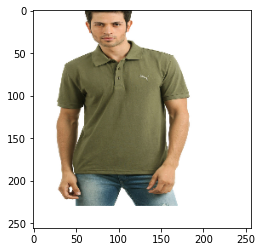

In [51]:
i = np.random.randint(60)

prediction = model(train_images[i:(i+1)]).numpy() 

plt.imshow(train_images[i:(i+1)][0])

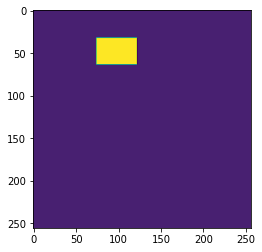

In [52]:

plt.imshow(target_images[i:(i+1)][0])

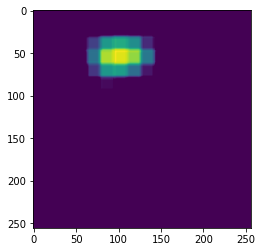

In [53]:

plt.imshow(prediction[0])

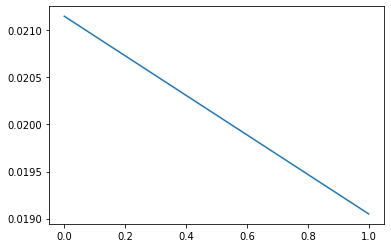

In [54]:
plt.plot(history.history['loss'])

In [55]:
Shirts = pd.read_csv(filepath_or_buffer="C:/Users/weime/Documents/Python Scripts/CircularFashion/Data/fashion-dataset/styles.csv",
            delimiter=",", encoding="utf-8", on_bad_lines = "skip")

Shirts = Shirts[Shirts["articleType"].str.match('.*[Ss]weaters.*|.*[Ss]hirt.*|.*[Ss]uits.*|.*[Jj]ackets.*')]

training_paths = os.listdir("C:/Users/weime/Documents/Python Scripts/CircularFashion/Data/fashion-dataset/targets")
extension = "_neckline"

training_ids = np.array([int(xi.removesuffix(extension + ".jpg")) for xi in training_paths])
Shirts["training_data"] =  np.array([xi in training_ids for xi in Shirts["id"]])

Now we want to test the NN on an image that was not in the training dataset.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.03459871 0.03009162 0.03968334]


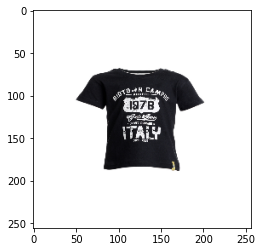

In [90]:

import cv2

def create_source_path(Id_loc):     
    return "C:/Users/weime/Documents/Python Scripts/CircularFashion/Data/fashion-dataset/images/"+ str(Id_loc) + ".jpg"

Id = Shirts[Shirts["training_data"] == False].sample(1).id

img_test = mpimg.imread(create_source_path(int(Id))).astype(float) / 255
img_test = cv2.resize(img_train, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)

print(img_test[100,100])

plt.imshow(img_test)

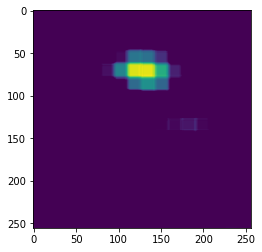

In [87]:
plt.imshow(model(img_test.reshape((1,256,256,3)))[0] )